INFO: Read 59 TLEs from /Users/umangsharma/Desktop/LEO-GEO-orbital-tracking-and-prediction/data/raw/INTELSAT.txt
INFO: Parsed 59 satellites


Sample satellite positions from INTELSAT.txt:
INTELSAT 10 (IS-10) - (np.float64(-20578.14), np.float64(36813.08), np.float64(5392.12))
INTELSAT 902 (IS-902) - (np.float64(5951.12), np.float64(41747.54), np.float64(522.22))
INTELSAT 904 (IS-904) - (np.float64(-10114.93), np.float64(40861.39), np.float64(2510.18))
DIRECTV 5 (TEMPO 1) - (np.float64(38967.19), np.float64(15919.36), np.float64(-2683.26))
INTELSAT 905 (IS-905) - (np.float64(41783.64), np.float64(-3528.24), np.float64(-4501.91))


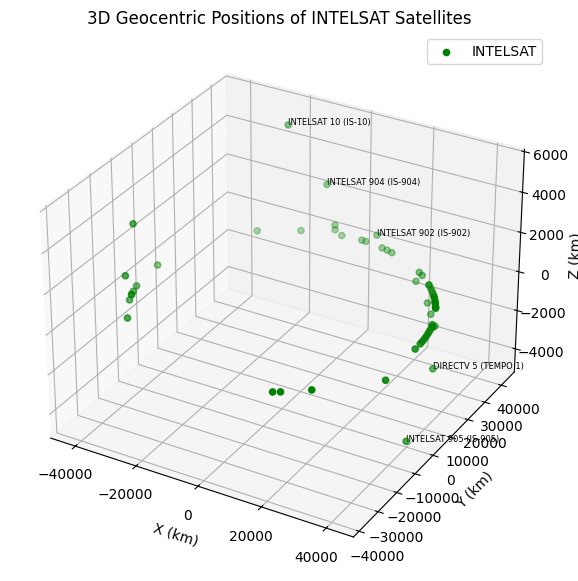

In [ ]:
import sys
from pathlib import Path
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # needed for 3D plots

project_root = Path("/Users/umangsharma/Desktop/LEO-GEO-orbital-tracking-and-prediction")
sys.path.append(str(project_root))
from src.data_utils import load_group, get_positions


tle_file_name = "STARLINK.txt" 
tle_file = project_root / f"data/raw/{tle_file_name}"


sats = load_group(tle_file)

positions = get_positions(sats)

print(f"Sample satellite positions from {tle_file_name}:")
for name, pos in list(positions.items())[:5]:
    print(name, "-", pos)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

xs = [pos[0] for pos in positions.values()]
ys = [pos[1] for pos in positions.values()]
zs = [pos[2] for pos in positions.values()]
labels = list(positions.keys())
ax.scatter(xs, ys, zs, c='green', marker='o', s=20, label=tle_file_name.split('.')[0])

for i, label in enumerate(labels[:5]):
    ax.text(xs[i], ys[i], zs[i], label, size=6, zorder=1)

ax.set_xlabel('X (km)')
ax.set_ylabel('Y (km)')
ax.set_zlabel('Z (km)')
ax.set_title(f'3D Geocentric Positions of {tle_file_name.split(".")[0]} Satellites')
plt.legend()
plt.show()

